In [119]:
%matplotlib notebook
#%matplotlib inline

Automatically created module for IPython interactive environment


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

(-5.5, 5.5, -8.990829274856868, 9.714523446430977)

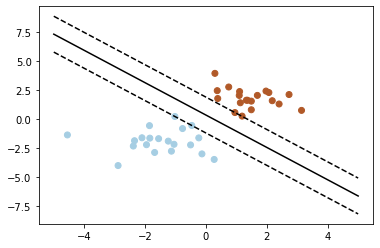

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

Text(0.5, 0, 'x-axis: a = 6 per ellipsoid')

Text(0.5, 0, 'y-axis: b = 10')

Text(0.5, 0, 'z-axis: c = 16')

(0, 24)

(0, 20)

(0, 32)

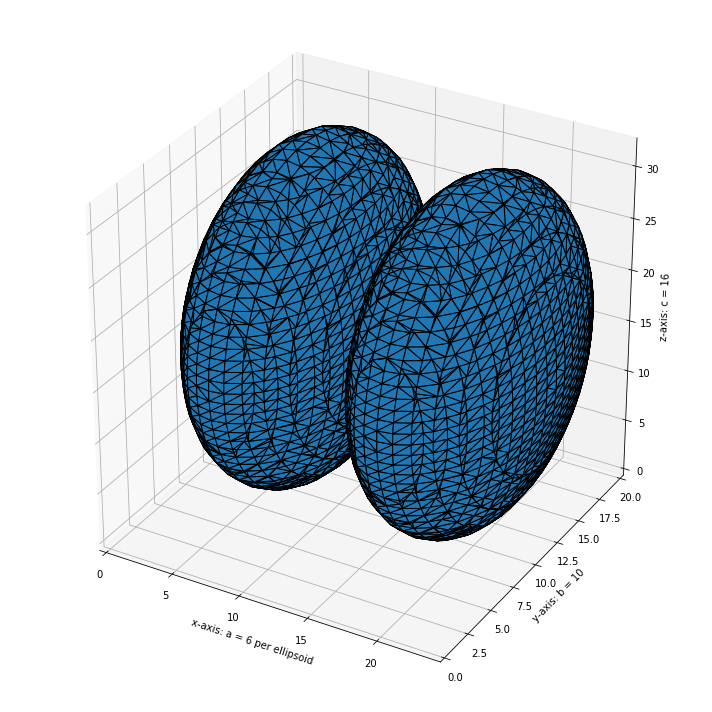

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid


# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes_lewiner(ellip_double, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

Text(0.5, 0.98, 'Novelty Detection')

(-5, 5)

(-5, 5)

(-5, 5)

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

Text(0.5, 0.92, 'error train: 30/200 ; errors novel regular: 8/40 ; errors novel abnormal: 0/40')

/home/dlevesque/miniconda3/envs/Jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:102: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


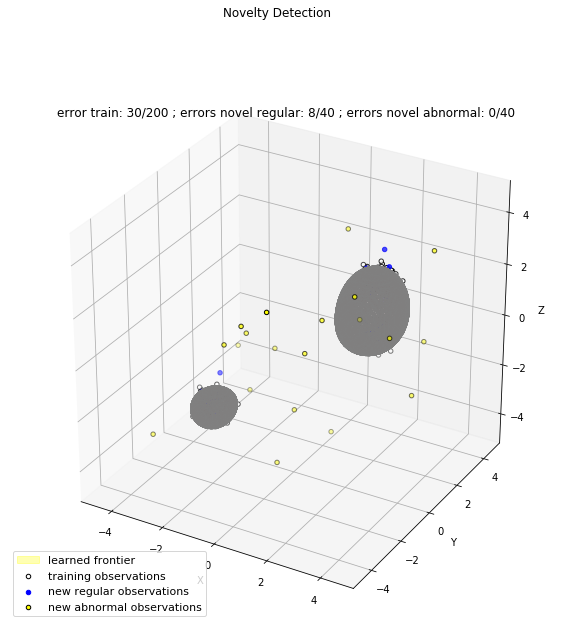

In [39]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
import skimage
from sklearn import svm
import matplotlib.font_manager
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

SPACE_SAMPLING_POINTS = 100
TRAIN_POINTS = 100

# Define the size of the space which is interesting for the example
X_MIN = -5
X_MAX = 5
Y_MIN = -5
Y_MAX = 5
Z_MIN = -5
Z_MAX = 5

# Generate a regular grid to sample the 3D space for various operations later
xx, yy, zz = np.meshgrid(np.linspace(X_MIN, X_MAX, SPACE_SAMPLING_POINTS),
                         np.linspace(Y_MIN, Y_MAX, SPACE_SAMPLING_POINTS),
                         np.linspace(Z_MIN, Z_MAX, SPACE_SAMPLING_POINTS))

# Generate training data by using a random cluster and copying it to various
# places in the space
X = 0.3 * np.random.randn(TRAIN_POINTS, 3)
X_train = np.r_[X + 2, X - 2, X + [2, 2, 0]]

# Generate some regular novel observations using the same method and
# distribution properties
X = 0.3 * np.random.randn(20, 3)
X_test = np.r_[X + 2, X - 2, X + [2, 2, 0]]

# Generate some abnormal novel observations using a different distribution
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 3))

# Create a OneClassSVM instance and fit it to the data
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# Predict the class of the various input created before
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# And compute classification error frequencies
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# Calculate the distance from the separating hyperplane of the SVM for the
# whole space using the grid defined in the beginning
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Create a figure with axes for 3D plotting
fig = plt.figure(figsize=(10,10)) 
ax = fig.gca(projection='3d')
fig.suptitle("Novelty Detection")

# Plot the different input points using 3D scatter plotting
b1 = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c='white', edgecolor='black')
b2 = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c='blue')
c = ax.scatter(X_outliers[:, 0], X_outliers[:, 1], X_outliers[:, 2], c='yellow', edgecolor='black')

# Plot the separating hyperplane by recreating the isosurface for t_he distance
# == 0 level in the distance grid computed through the decision function of the
# SVM. This is done using the marching cubes algorithm implementation from
# scikit-image.
verts, faces = skimage.measure.marching_cubes_classic(Z, 0)
# Scale and transform to actual size of the interesting volume
verts = verts * \
    [X_MAX - X_MIN, Y_MAX - Y_MIN, Z_MAX - Z_MIN] / SPACE_SAMPLING_POINTS
verts = verts + [X_MIN, Y_MIN, Z_MIN]
# and create a mesh to display
mesh = Poly3DCollection(verts[faces],
                        facecolor='red', edgecolor='grey')
mesh.set_alpha(.01) 
ax.add_collection3d(mesh)

# Some presentation tweaks
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_zlim((-5, 5))

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend([mpatches.Patch(color='yellow', alpha=0.3), b1, b2, c],
          ["learned frontier", "training observations",
           "new regular observations", "new abnormal observations"],
          loc="lower left",
          prop=matplotlib.font_manager.FontProperties(size=11))
ax.set_title(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
fig.show()

<IPython.core.display.Javascript object>


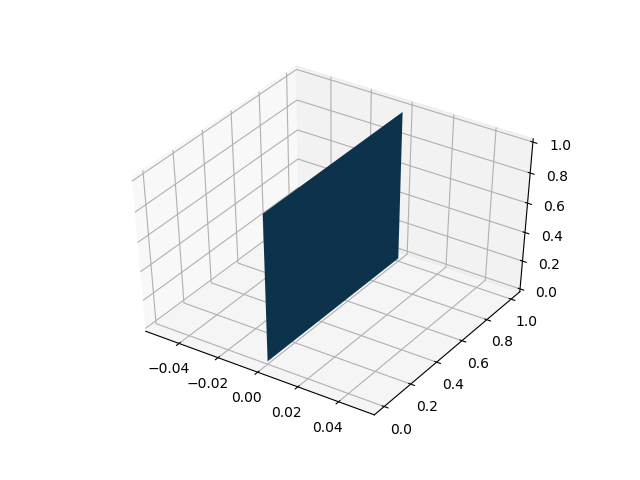

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

yy, zz = np.meshgrid(range(2), range(2))
xx = yy*0

ax = plt.subplot(projection='3d')
ax.plot_surface(xx, yy, zz)
plt.show()

In [46]:
xx
yy
zz


array([[0, 0],
       [0, 0]])

array([[0, 1],
       [0, 1]])

array([[0, 0],
       [1, 1]])

In [48]:
>>> import numpy as np
>>> from skimage.draw import rectangle
>>> img = np.zeros((5, 5), dtype=np.uint8)
>>> start = (1, 1)
>>> extent = (3, 3)
>>> rr, cc = rectangle(start, extent=extent, shape=img.shape)
>>> img[rr, cc] = 1
>>> img


array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
from sklearn import svm
SPACE_SAMPLING_POINTS = 100
TRAIN_POINTS = 100

# Define the size of the space which is interesting for the example
X_MIN = -5
X_MAX = 5
Y_MIN = -5
Y_MAX = 5
Z_MIN = -5
Z_MAX = 5

# Generate a regular grid to sample the 3D space for various operations later
xx, yy, zz = np.meshgrid(np.linspace(X_MIN, X_MAX, SPACE_SAMPLING_POINTS),
                         np.linspace(Y_MIN, Y_MAX, SPACE_SAMPLING_POINTS),
                         np.linspace(Z_MIN, Z_MAX, SPACE_SAMPLING_POINTS))

# Generate training data by using a random cluster and copying it to various
# places in the space
X = 0.3 * np.random.randn(TRAIN_POINTS, 3)
X_train = np.r_[X + 2, X - 2, X + [2, 2, 0]]

svm = svm.SVC(kernel='linear')

svm.fit(features, labels)
svm.coef_

In [107]:
X_train = np.r_[X + 2, X - 2, X + [2, 2, 0]]
X + [2, 2, 0]

array([[ 9.94859378e-01,  2.26968620e+00, -2.55884279e-01],
       [ 1.02753367e+00,  2.28914285e+00, -7.50811754e-01],
       [ 1.86824271e+00,  3.46270984e+00,  1.64148298e-01],
       [ 1.36464839e+00,  1.37502877e+00, -1.35535927e+00],
       [ 2.52079084e+00,  8.61039721e-01,  3.02994166e-01],
       [ 2.26951493e+00,  2.26073280e+00,  1.52055912e+00],
       [ 6.05233223e-01,  2.26216660e+00,  3.71525831e-02],
       [ 1.69600370e+00,  1.16408442e+00,  1.58902017e+00],
       [ 6.19444493e-01,  3.12748338e+00, -1.24716717e+00],
       [ 4.80550457e-01,  1.60486357e+00,  4.61671906e-01],
       [ 3.04690444e-01,  1.93502845e+00, -2.45131297e+00],
       [ 1.45079328e+00,  5.31760767e-01, -9.17041282e-01],
       [ 3.45752447e-01,  1.66259946e+00, -4.10768113e-01],
       [ 1.62564627e+00,  2.12265004e+00,  5.69557198e-01],
       [ 1.10891279e+00,  1.11328982e+00,  4.34225980e-01],
       [ 1.50738313e+00,  3.89217849e+00, -7.06771369e-01],
       [ 9.24519315e-01,  2.26418581e+00

AttributeError: module 'numpy' has no attribute 'prec'

In [112]:
X = np.random.randn(TRAIN_POINTS, 3, int)
X.max()
ax = plt.subplot()#projection='3d'
ax.scatter(X[:,0],X[:,1])
plt.show()

TypeError: 'type' object cannot be interpreted as an integer

<IPython.core.display.Javascript object>


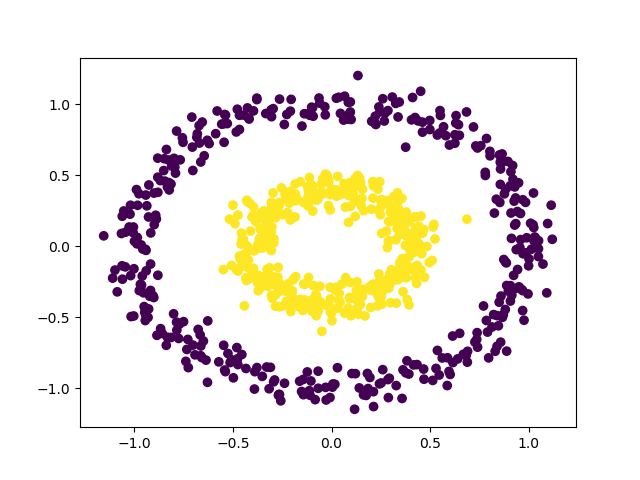

<IPython.core.display.Javascript object>


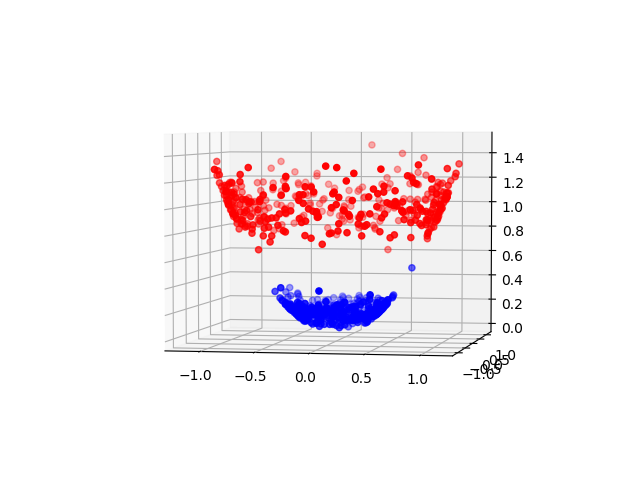

<IPython.core.display.Javascript object>


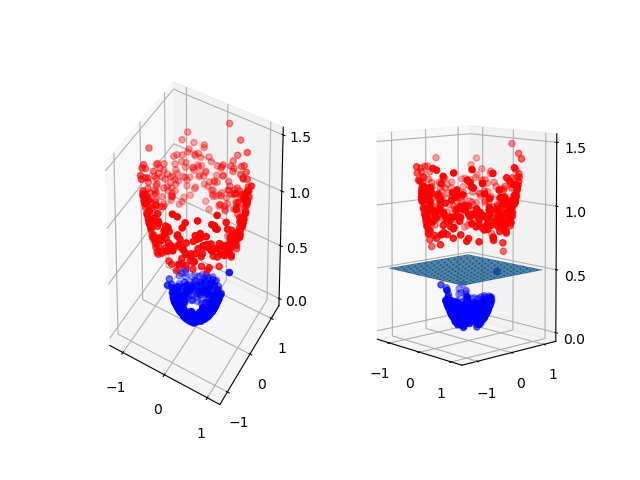

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


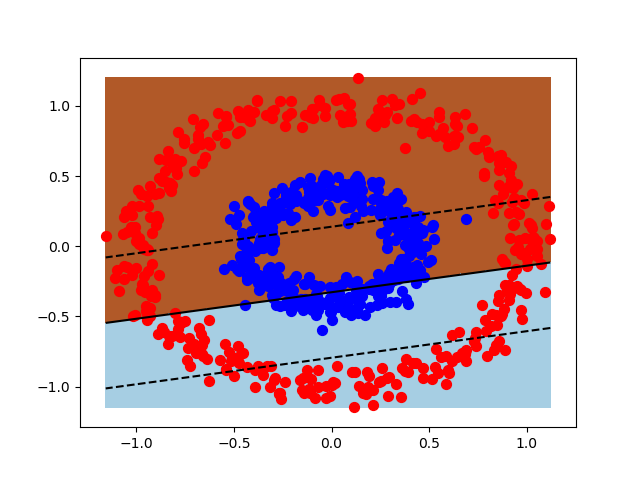

linear  Kernal Accuracy:  0.605


/home/dlevesque/miniconda3/envs/Jupyter/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


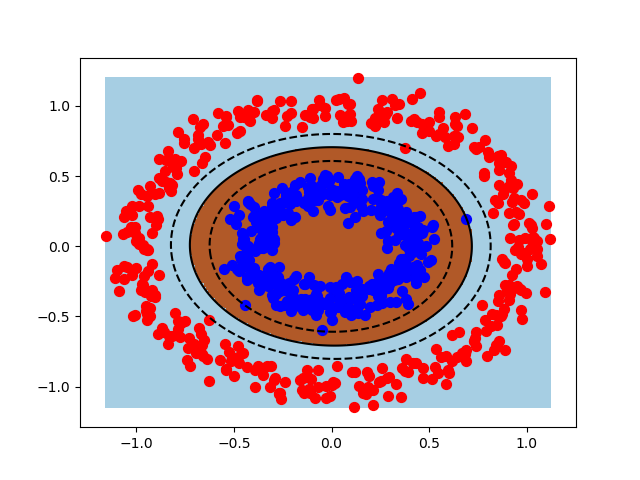

rbf  Kernal Accuracy:  1.0


In [120]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
visualization=True

def create_data():
	x,y=make_circles(n_samples=800,noise=.07,factor=.4)
	if visualization:
		plt.scatter(x[:,0],x[:,1],c=y+1)
		plt.show()
	return x,y

def project_data(data):
	x=data[:,0]
	y=data[:,1]
	z=x**2+y**2
	return x,y,z

def plot_decision_surface_manual(x,y,z,label):
	fig = plt.figure()
	ax = fig.add_subplot(121,projection='3d')
	ax.scatter(x[label==0],y[label==0],z[label==0],c='r')
	ax.scatter(x[label==1],y[label==1],z[label==1],c='b')
	ax1 = fig.add_subplot(122,projection='3d')
	ax1.scatter(x[label==0],y[label==0],z[label==0],c='r')
	ax1.scatter(x[label==1],y[label==1],z[label==1],c='b')
	plane_x=np.arange(-1.25,1.25,.1)
	plane_y=np.arange(-1.25,1.25,.1)
	X,Y=np.meshgrid(plane_x,plane_y)
	Z=np.zeros(X.shape)
	Z[:,:]=.5
	ax1.plot_surface(X,Y,Z)
	plt.show()
	
def plot_decision_surface_sklearn(clf,X,y):
    X0 = X[np.where(y == 0)]
    X1 = X[np.where(y == 1)]

    plt.figure()
    
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
              linestyles=['--', '-', '--'],
              levels=[-.5, 0, .5])
    plt.scatter(X0[:, 0], X0[:, 1], c='r',s=50)
    plt.scatter(X1[:, 0], X1[:, 1], c='b',s=50)
    plt.show()

data,label=create_data()
x,y,z=project_data(data)
if visualization:
	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')
	ax.scatter(x[label==0],y[label==0],z[label==0],c='r')
	ax.scatter(x[label==1],y[label==1],z[label==1],c='b')
	plt.show()
	plot_decision_surface_manual(x,y,z,label)
train=np.c_[x,y]
for kernel_type in ['linear','rbf']:
	clf=SVC(kernel=kernel_type)
	clf.fit(train,label)
	if visualization:
		plot_decision_surface_sklearn(clf,train,label)
	output=clf.predict(train)
	print(kernel_type," Kernal Accuracy: ",accuracy_score(label,output))


<IPython.core.display.Javascript object>


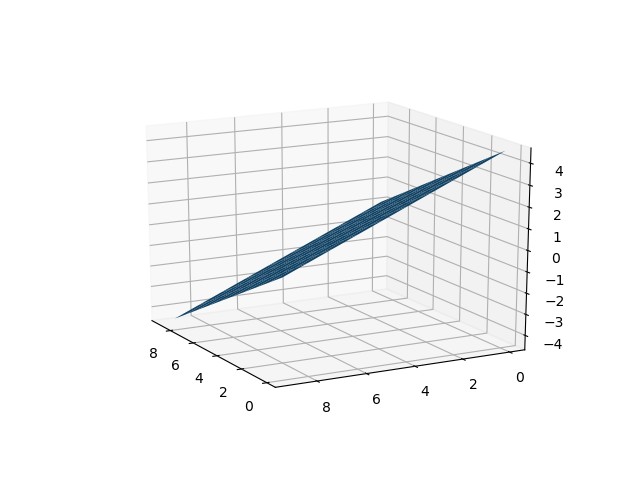

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt.show()



In [126]:
d2

8

<IPython.core.display.Javascript object>


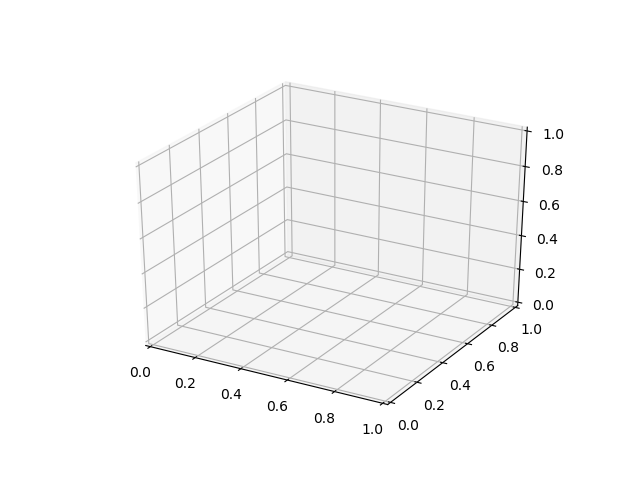

ValueError: Wrong number of arguments. Expected 6 got 1

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point1  = np.array([0,0,0])
normal1 = np.array([1,-2,1])

point2  = np.array([0,-4,0])
normal2 = np.array([0,2,-8])

point3  = np.array([0,0,1])
normal3 = np.array([-4,5,9])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d1 = -np.sum(point1*normal1)# dot product
d2 = -np.sum(point2*normal2)# dot product
d3 = -np.sum(point3*normal3)# dot product

# create x,y
xx, yy = np.meshgrid(range(30), range(30))

# calculate corresponding z
z1 = (-normal1[0]*xx - normal1[1]*yy - d1)*1./normal1[2]
z2 = (-normal2[0]*xx - normal2[1]*yy - d2)*1./normal2[2]
z3 = (-normal3[0]*xx - normal3[1]*yy - d3)*1./normal3[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
#plt3d.plot_surface(xx,yy,z1, color='blue')
#plt3d.plot_surface(xx,yy,z2, color='yellow')
#plt3d.plot_surface(xx,yy,z3, color='cyan')
plt.quiver(normal1)
plt.show()

In [135]:
data = cluster_data[:ALLOWED_PEAKS, :]

grid_steps = 20

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)

X, Y = np.meshgrid(np.linspace(mn[0], mx[0], grid_steps),
                   np.linspace(mn[1], mx[1], grid_steps))
XX = X.flatten()
YY = Y.flatten()

# best-fit linear plane (1st-order)
A = np.c_[data[:, 0], data[:, 1], np.ones(data.shape[0])]
C, _, _, _ = scipy.linalg.lstsq(A, data[:, 2])    # coefficients

# evaluate it on grid
Z = C[0] * X + C[1] * Y + C[2]

gci = int((grid_steps / 2) - 1 ) # grid_center_index

centroid = np.array([X[gci, gci], Y[gci, gci], Z[gci, gci]]).reshape(1,-1)  # take center point of grid steps

surface_norm = np.array([-C[0], -C[1], 1]).reshape(1,-1)

surface_norm_unit = normalize(surface_norm, norm='l2')

centroid_norm = centroid + surface_norm_unit

NameError: name 'cluster_data' is not defined